# Regenerate Plots for Allele Diversity Simulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10, 8)
plt.style.use("ggplot")

In [2]:
#Function needed to generate box plots
def construct_boxPlot(csv,type_of_data,coverage):
    if type_of_data == 'Recall':
        label = type_of_data
        limit = [0,2]
    elif  type_of_data == 'Precision':
        label = type_of_data
        limit = [0,2]
    else:
        label = 'Total Variation Distance'
        limit = [-20,100]
    #read in as dataframe
    df = pd.read_csv(csv, sep='\t')
    df.drop(df.columns[[0]], axis=1,inplace=True)
        
    #plot the data
    df.plot(kind='box',xlim=[0,9],ylim=limit,title="{}X Coverage Simulation: 40 simulations each gene".format(coverage), grid=True)
    plt.xlabel('Loci')
    plt.ylabel(label)
    plt.xticks([1,2,3,4,5,6,7,8],['clpA','clpX','nifS','pepX','pyrG','recG','rplB','uvrA'])
    plt.show()
    



## Plots for 30X coverage

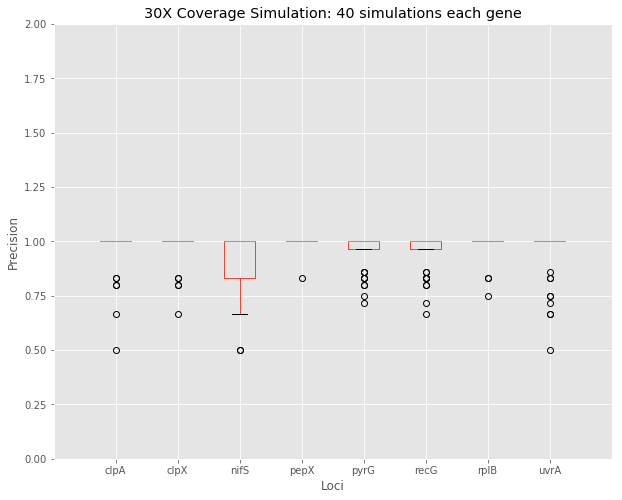

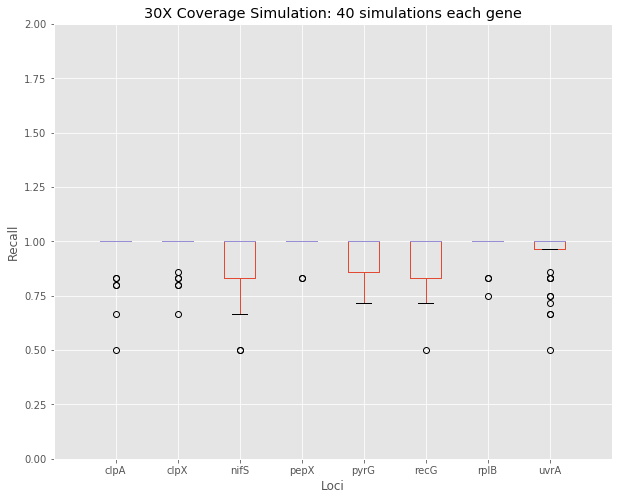

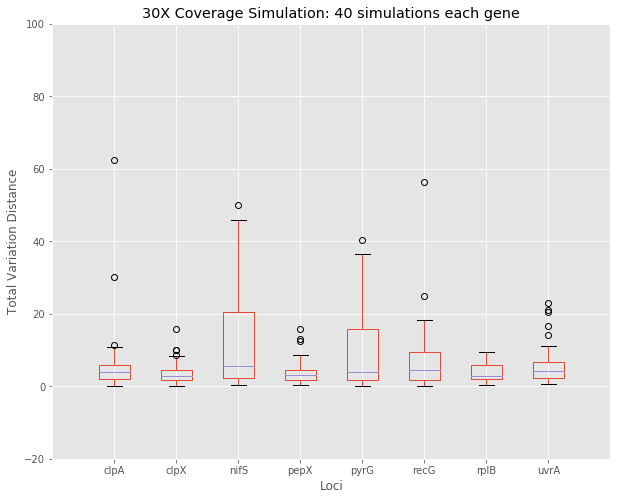

In [3]:
root=os.getcwd()
alleleSimFold = os.path.join(root, "alleleSimulation")
construct_boxPlot(os.path.join(alleleSimFold, "30X", "30X_precision.csv"), "Precision", 30)
construct_boxPlot(os.path.join(alleleSimFold, "30X", "30X_recall.csv"), "Recall", 30)
construct_boxPlot(os.path.join(alleleSimFold, "30X", "30X_totalVarDist_count.csv"), "Total Variation Distance", 30)

## Plots for 100X coverage

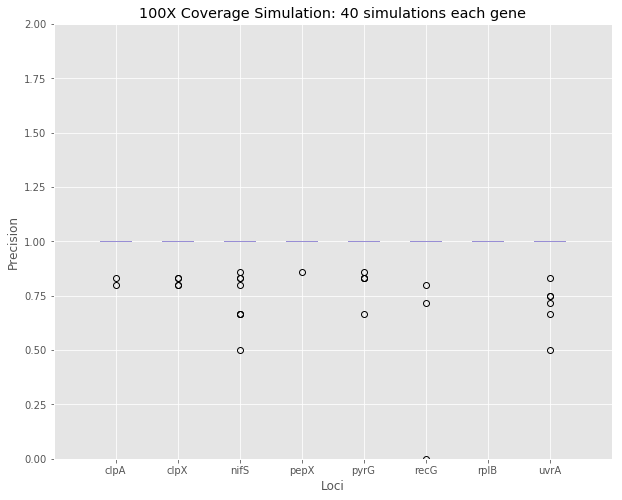

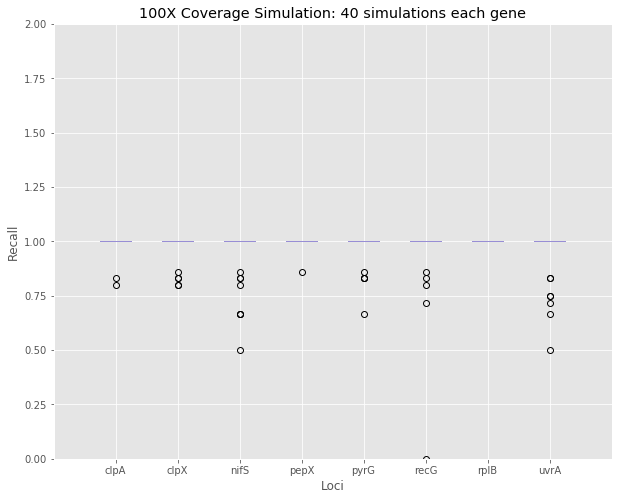

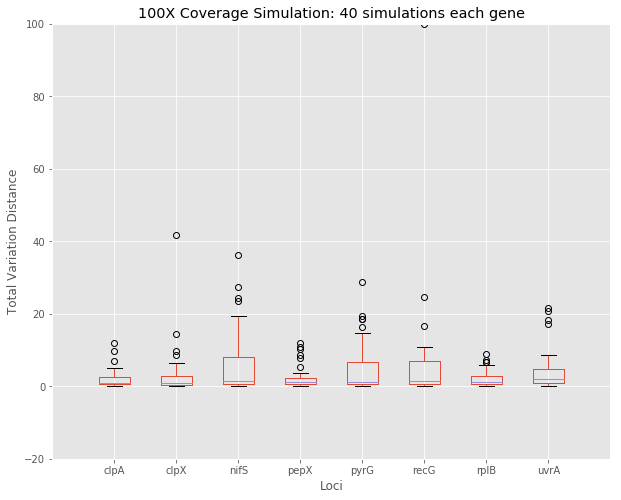

In [4]:
construct_boxPlot(os.path.join(alleleSimFold, "100X", "100X_precision.csv"), "Precision", 100)
construct_boxPlot(os.path.join(alleleSimFold, "100X", "100X_recall.csv"), "Recall", 100)
construct_boxPlot(os.path.join(alleleSimFold, "100X", "100X_totalVarDist_count.csv"), "Total Variation Distance", 100)

## Plots for 300X coverage

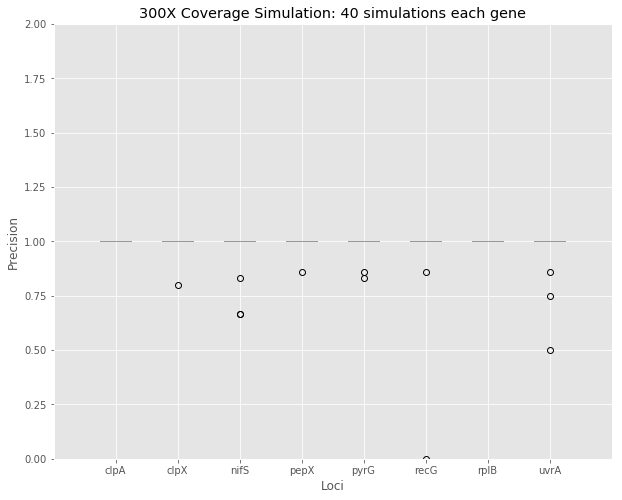

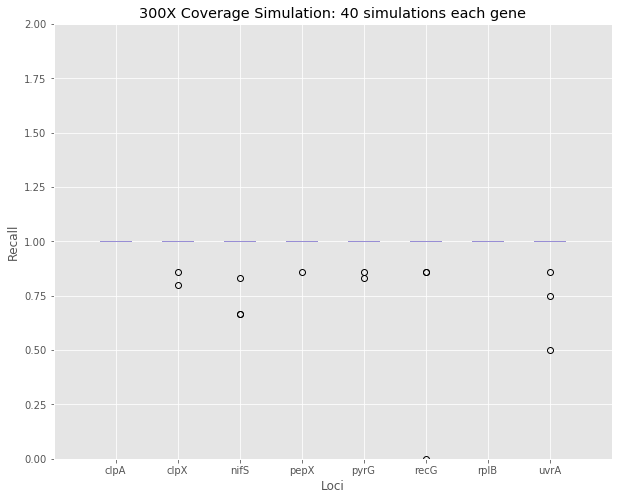

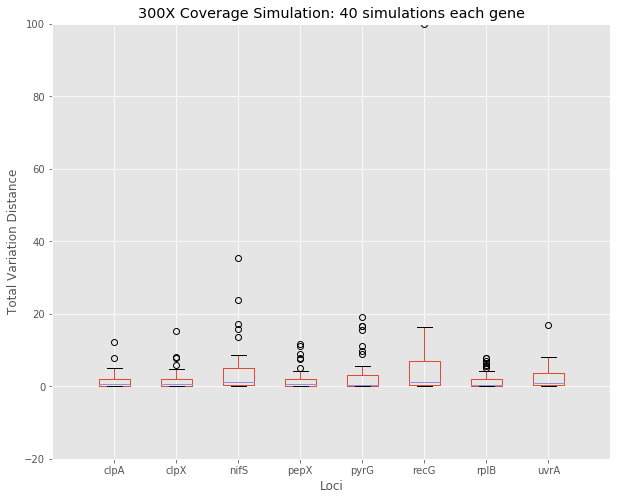

In [5]:
construct_boxPlot(os.path.join(alleleSimFold, "300X", "300X_precision.csv"), "Precision", 300)
construct_boxPlot(os.path.join(alleleSimFold, "300X", "300X_recall.csv"), "Recall", 300)
construct_boxPlot(os.path.join(alleleSimFold, "300X", "300X_totalVarDist_count.csv"), "Total Variation Distance", 300)

# Regenerate Plots for Strain Diversity Simulation

In [6]:
#To Do by Elijah
def Construct_BoxPlots(Type, Recomb, Mut, Type2):
    if Type == 'Recall':
        label = Type
        limit = [0,2]
    elif Type == 'Precision':
        label = Type
        limit = [0,2]
    else:
        label = 'TVD'
        limit = [-1,1]
    #read in the dataframe
    df = pd.read_csv(Recomb, sep='\t')
    df.drop(df.columns[0], axis=1,inplace=True)
    df = df.T
    df2 = pd.read_csv(Mut, sep='\t')
    df2.drop(df2.columns[0], axis=1,inplace=True)
    df2 = df2.T
    frames = [df, df2]
    result = pd.concat(frames, axis = 1)
    ax = result.plot(kind='box',xlim=[0,3],ylim=limit,title="{0} Boxplots for Recombination and Mutation for {1} Simulations".format(label, Type2), grid=True)
    ax.set_xlabel('Type of Simulation')
    ax.set_ylabel(label)
    plt.xticks([1,2],['Recombination', 'Mutation'])
    plt.show()

## Recall plot for simple cases

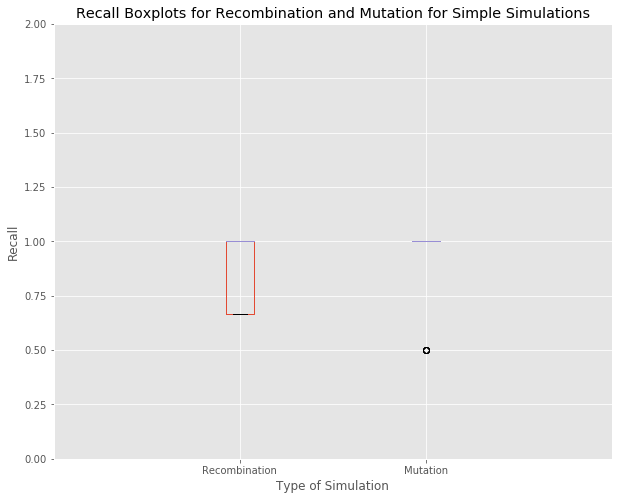

In [7]:
strainsFold = os.path.join(root, "strainSimulation")
Recomb = os.path.join(strainsFold, "Simple", "Recombination", "Recall_values.csv")
Mut = os.path.join(strainsFold, "Simple", "Mutation", "Recall_values.csv")
Construct_BoxPlots('Recall', Recomb, Mut, 'Simple')

## Precision plot for simple cases

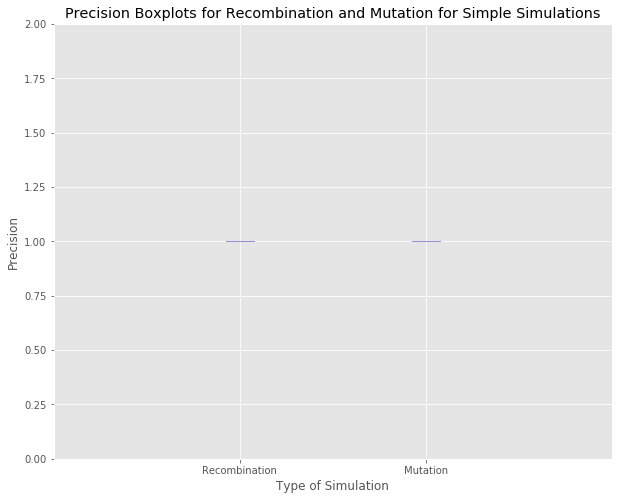

In [8]:
Recomb = os.path.join(strainsFold, "Simple", "Recombination", "Precision_values.csv")
Mut = os.path.join(strainsFold, "Simple", "Mutation", "Precision_values.csv")
Construct_BoxPlots('Precision', Recomb, Mut, 'Simple')

## TVD plot for simple cases

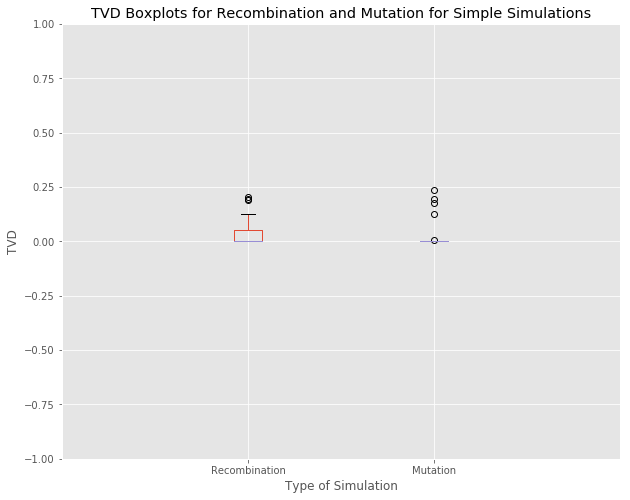

In [10]:
Recomb = os.path.join(strainsFold, "Simple", "Recombination", "Total_Variation_Distance.csv")
Mut = os.path.join(strainsFold, "Simple", "Mutation", "Total_Variation_Distance.csv")
Construct_BoxPlots('TVD', Recomb, Mut, 'Simple')

## Recall plot for complex cases

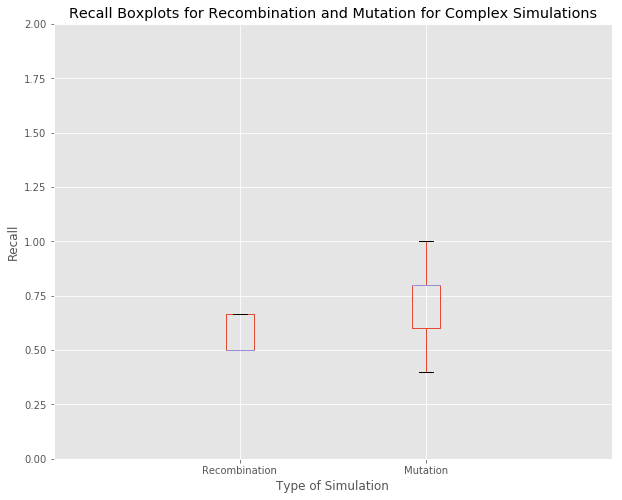

In [11]:
Recomb = os.path.join(strainsFold, "Complex", "Recombination", "Recall_values.csv")
Mut = os.path.join(strainsFold, "Complex", "Mutation", "Recall_values.csv")
Construct_BoxPlots('Recall', Recomb, Mut, 'Complex')

## Precision plot for complex cases

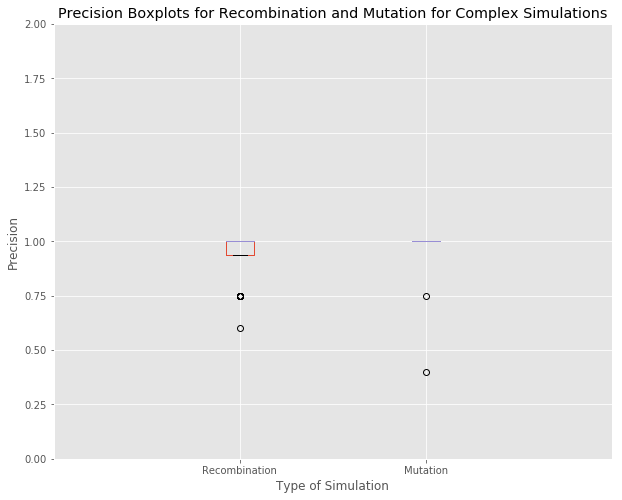

In [12]:
Recomb = os.path.join(strainsFold, "Complex", "Recombination", "Precision_values.csv")
Mut = os.path.join(strainsFold, "Complex", "Mutation", "Precision_values.csv")
Construct_BoxPlots('Precision', Recomb, Mut, 'Complex')

## TVD plot for complex cases

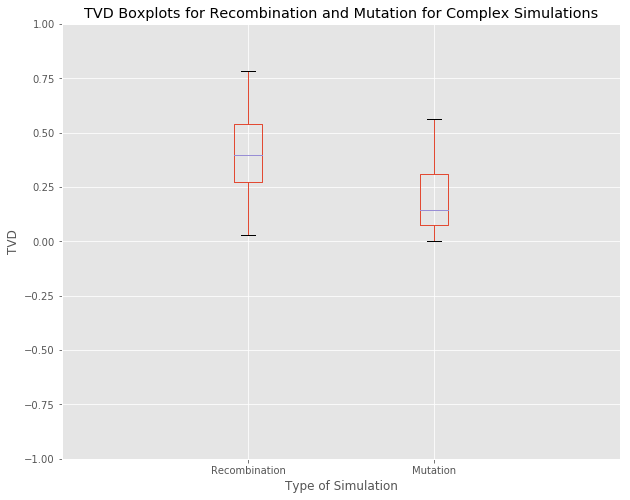

In [13]:
Recomb = os.path.join(strainsFold, "Complex", "Recombination", "Total_Variation_Distance.csv")
Mut = os.path.join(strainsFold, "Complex", "Mutation", "Total_Variation_Distance.csv")
Construct_BoxPlots('TVD', Recomb, Mut, 'Complex')

# Regenerate Plots for Real Data

In [22]:
#Real Data
realData = os.path.join(root, "realData")

## Time taken for solving Allele Diversity Problem on each sample

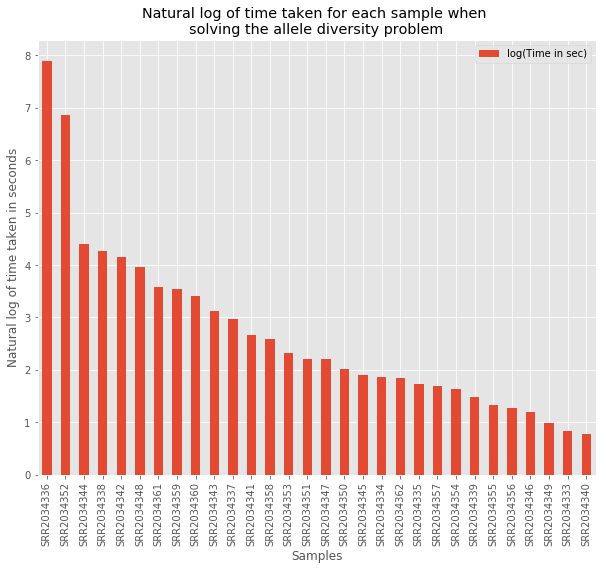

In [23]:
timeTakenAlleleDiv = pd.read_csv(os.path.join(realData, "time_ilp1.csv"))
timeTakenAlleleDiv.sort_values(by="Time(sec)", inplace=True, ascending=False)
timeTakenAlleleDiv["log(Time in sec)"] = np.log(timeTakenAlleleDiv["Time(sec)"])
timeTakenAlleleDiv.plot(kind="bar",x="Sample", y="log(Time in sec)")
plt.xlabel("Samples")
plt.ylabel("Natural log of time taken in seconds")
plt.title("Natural log of time taken for each sample when \nsolving the allele diversity problem")
plt.show()

## Distribution of strains for each sample

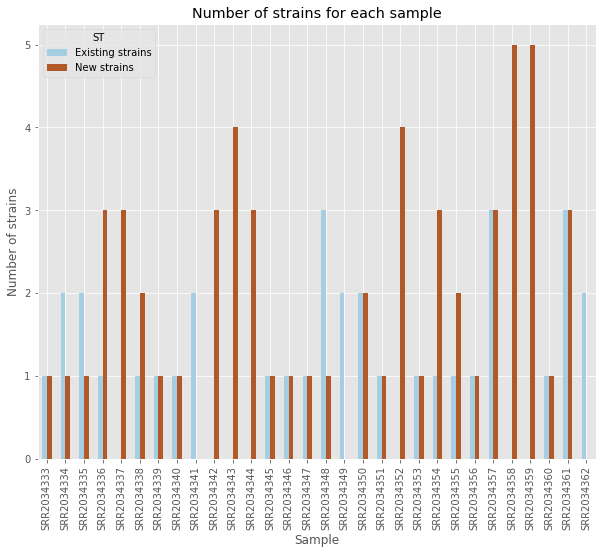

In [24]:
#read in data
strProp_samp_df = pd.read_csv(os.path.join(realData, "strainsAndProportions_samp.csv")).drop("Unnamed: 0", axis=1)

samp_df_new_pivot = strProp_samp_df.replace({"New":True, "Existing":False}).pivot_table(index="Sample", columns="ST", values="New/Existing")
samp_df_new_pivot["New strains"] = samp_df_new_pivot[samp_df_new_pivot == True].count(axis=1)
samp_df_new_pivot["Existing strains"] = samp_df_new_pivot[samp_df_new_pivot == False].count(axis=1)

samp_df_new_pivot[["Existing strains", "New strains"]].plot(kind='bar', legend=True, cmap=plt.cm.Paired)
plt.xlabel("Sample")
plt.ylabel("Number of strains")
plt.title("Number of strains for each sample")
plt.show()

## Composition of existing strains and new strains

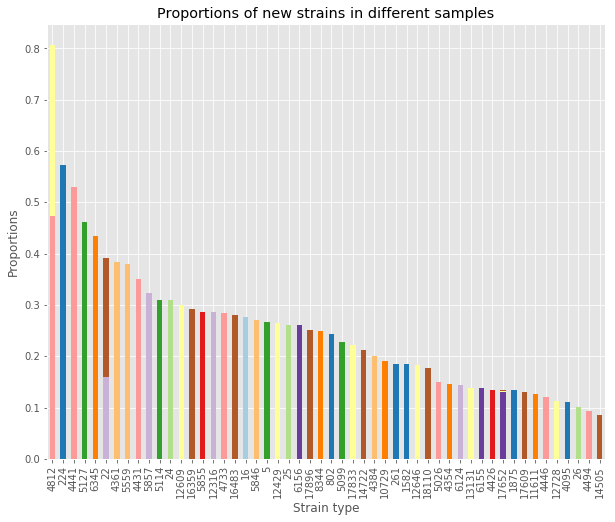

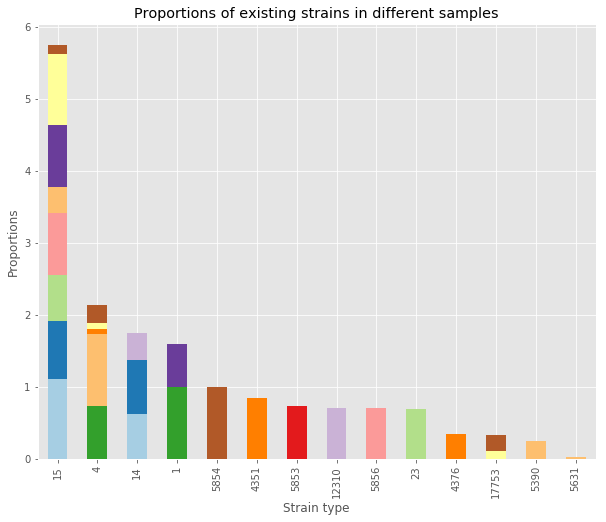

In [25]:
#New strains
df_new = strProp_samp_df[strProp_samp_df["New/Existing"] =="New"]
newStrComp = df_new.pivot(index='ST', columns='Sample', values='Proportion')
newStrComp["Sum"] = newStrComp.sum(axis=1)
newStrComp.sort_values(by='Sum', inplace=True, ascending=False)
newStrComp.drop(['Sum'], axis=1).plot(kind='bar', stacked=True, legend=False, sort_columns=True, cmap=plt.cm.Paired)
plt.xlabel('Strain type')
plt.ylabel('Proportions')
plt.title('Proportions of new strains in different samples')
plt.show()

#Existing strains
df_exist = strProp_samp_df[strProp_samp_df["New/Existing"] =="Existing"]
existStrComp = df_exist.pivot(index='ST', columns='Sample', values='Proportion')
existStrComp["Sum"] = existStrComp.sum(axis=1)
existStrComp.sort_values(by='Sum', inplace=True, ascending=False)
existStrComp.drop(['Sum'], axis=1).plot(kind='bar', stacked=True, legend=False, sort_columns=True, cmap=plt.cm.Paired)
plt.xlabel('Strain type')
plt.ylabel('Proportions')
plt.title('Proportions of existing strains in different samples')
plt.show()